In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 70 #display 70 dpi in Jupyter Notebook, may consider100 dpi 
plt.rcParams['savefig.dpi'] = 300 #define 300 dpi for saving figures

import seaborn as sns
## here are some settings 
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":70, 'savefig.dpi':300}) #defining dpi setting
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

from time import time
import timeit #imports timeit module
start_time = timeit.default_timer() #defines start time so computational time can be calculated
elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()

---Run time is 2.3699999999848842e-05 seconds ---



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures

import sklearn.linear_model as skl_lm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import neighbors

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
dfes = pd.read_csv('../RiverRoad_Quan_RF.csv')
dfes

,GRID_ID,qu_dem_MIN,qu_dem_MAX,qu_dem_RANGE,qu_dem_MEAN,qu_dem_STD,qu_dem_SUM,qu_dsm_MIN,qu_dsm_MAX,qu_dsm_RANGE,...,qu_curpl_SUM,qu_curpr_MIN,qu_curpr_MAX,qu_curpr_RANGE,qu_curpr_MEAN,qu_curpr_STD,qu_curpr_SUM,wetland_type,FID_RiverRd_AOI,wetland
0,AA-10,0.691847,1.731059,1.039212,1.117221,0.202755,313.939159,0.731374,6.256660,5.525286,...,1688.477507,-561.943237,585.859314,1147.802551,-6.984654,173.043352,-1941.733846,nonwetland,0,nonwetland
1,AA-11,0.641888,1.487661,0.845773,1.059745,0.147762,295.668776,0.661373,6.679267,6.017894,...,-1129.404510,-841.298767,679.957519,1521.256287,0.069758,168.483844,19.392675,nonwetland,0,nonwetland
2,AA-12,0.770032,1.507396,0.737363,1.176038,0.160304,329.290651,0.770032,5.681332,4.911300,...,-994.710507,-614.981445,614.381775,1229.363220,-9.649778,201.707961,-2692.288038,nonwetland,0,nonwetland
3,AA-13,0.761148,1.413489,0.652341,1.131694,0.115760,316.874198,0.761148,1.462370,0.701221,...,-2264.176594,-577.830017,633.895386,1211.725403,-1.244892,180.105412,-347.324849,nonwetland,0,nonwetland
4,AA-14,0.696000,1.392386,0.696386,1.160470,0.116413,322.610787,0.667013,1.392386,0.725372,...,-571.203099,-574.029480,501.253113,1075.282593,-1.556956,170.969213,-435.947672,nonwetland,0,nonwetland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8606,Z-95,0.851000,1.676798,0.825798,1.409729,0.230505,390.494948,0.851000,1.676798,0.825798,...,106.915450,-692.625366,738.732422,1431.357788,4.547107,170.083954,1268.642730,PEM1Rd,1,wetland
8607,Z-96,0.723952,1.662994,0.939042,1.425776,0.219366,396.365613,0.723952,1.662994,0.939042,...,-327.422941,-390.115845,542.452454,932.568298,10.324390,134.407219,2890.829178,PEM1Rd,1,wetland
8608,Z-97,0.836438,1.653542,0.817103,1.452142,0.180319,406.599629,0.836438,1.653542,0.817103,...,279.791020,-728.279236,753.877563,1482.156799,1.897032,165.294550,527.374799,PEM1Rd,1,wetland
8609,Z-98,0.997941,1.636024,0.638083,1.461971,0.166600,406.427984,0.997941,1.636024,0.638083,...,-313.958618,-622.526367,402.200531,1024.726898,4.975549,115.808141,1383.202760,PEM1Rd,1,wetland


In [4]:
X = dfes.drop(['GRID_ID', 'wetland_type', 'FID_RiverRd_AOI', 'wetland'], axis = 1)
y = dfes.FID_RiverRd_AOI
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)
#X_train = ['qu_dem_MEAN', 'qu_dsm_MEAN','qu_hyddem_MEAN','qu_smdem_MEAN','qu_asp_MEAN','qu_floAcu_MEAN','qu_floDir_MEAN','qu_curv_MEAN','qu_curpl_MEAN','qu_curpr_MEAN']

In [5]:
crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)
knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
model = knn.fit(X, y)
scores = cross_val_score(model, X, y, cv=crossvalidation)
print('Accuracy of each fold: \n {}'.format(scores))
print()
print("Avg accuracy: {}".format(scores.mean()))

Accuracy of each fold: 
 [0.79860708 0.79442509 0.77816492 0.80081301 0.7804878 ]

Avg accuracy: 0.7904995810591553


In [6]:
crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)

result=[]
for k in range(10,20):
    knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    model = knn.fit(X, y)
    
    scores = cross_val_score(model, X, y, cv=crossvalidation)
    print("k is", k)
    print('Accuracy of each fold: \n {}'.format(scores))
    print("Avg accuracy: {}".format(scores.mean()))
    print()
    result.append(scores.mean())
print(np.max(result))

k is 10
Accuracy of each fold: 
 [0.84445734 0.83042973 0.83217189 0.83855981 0.82520325]
Avg accuracy: 0.8341644068127938

k is 11
Accuracy of each fold: 
 [0.84793964 0.83101045 0.83275261 0.84610918 0.82636469]
Avg accuracy: 0.8368353147920834

k is 12
Accuracy of each fold: 
 [0.84619849 0.83275261 0.83391405 0.8466899  0.82810685]
Avg accuracy: 0.8375323811276418

k is 13
Accuracy of each fold: 
 [0.85084156 0.82984901 0.83217189 0.84610918 0.82462253]
Avg accuracy: 0.8367188337334

k is 14
Accuracy of each fold: 
 [0.84677887 0.83217189 0.83042973 0.8466899  0.83042973]
Avg accuracy: 0.8373000256824555

k is 15
Accuracy of each fold: 
 [0.84561811 0.82984901 0.83042973 0.84088269 0.82694541]
Avg accuracy: 0.834744992089669

k is 16
Accuracy of each fold: 
 [0.84619849 0.83159117 0.83565621 0.84262485 0.82984901]
Avg accuracy: 0.8371839490718926

k is 17
Accuracy of each fold: 
 [0.84619849 0.82926829 0.83217189 0.84030197 0.82810685]
Avg accuracy: 0.8352095007559809

k is 18
Accu

In [7]:
bagged_dfes = RandomForestRegressor (max_features = 60, random_state = 2)
bagged_dfes.fit(X_train, y_train)

RandomForestRegressor(max_features=60, random_state=2)

0.062194776552524665

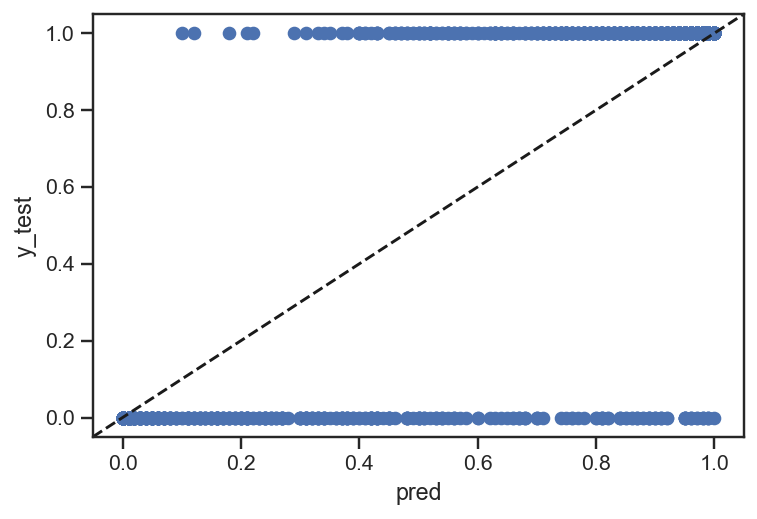

In [8]:
pred = bagged_dfes.predict(X_test)

plt.scatter(pred, 
            y_test, 
            label = 'FID_RiverRd_AOI')

plt.plot([0, 1], 
         [0, 1], 
         '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('pred')
plt.ylabel('y_test')

mean_squared_error(y_test, pred)

In [9]:
crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)
model = RandomForestRegressor(max_features = 60, random_state = 2)
scores = cross_val_score(model, X, y, cv=crossvalidation)
print('Accuracy of each fold: \n {}'.format(scores))
print()
print("Avg accuracy: {}".format(scores.mean()))

Accuracy of each fold: 
 [0.73071746 0.72684307 0.70748297 0.72229741 0.72279322]

Avg accuracy: 0.722026824576613


In [10]:
boosted_dfes = GradientBoostingRegressor(n_estimators = 500, 
                                           learning_rate = 0.01, 
                                           max_depth = 4, 
                                           random_state = 1)

boosted_dfes.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                          random_state=1)

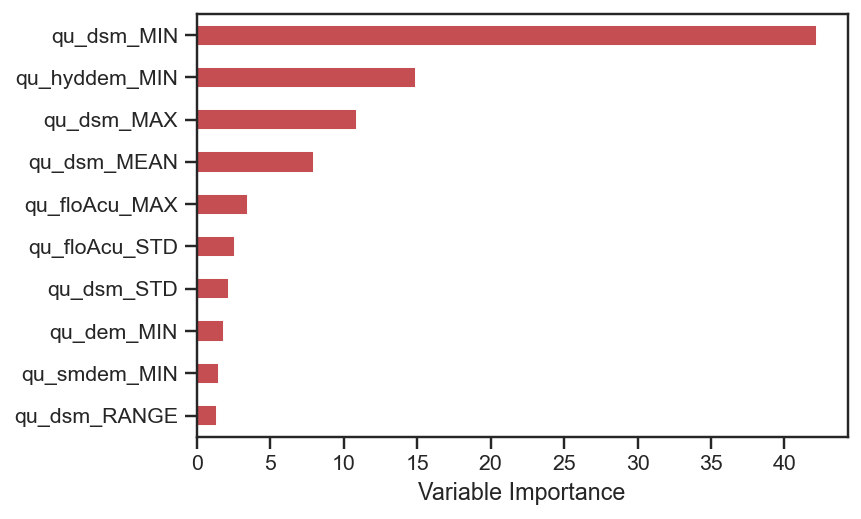

In [11]:
feature_importance = boosted_dfes.feature_importances_*100

rel_imp = pd.Series(feature_importance, 
                    index = X_train.columns).sort_values(inplace = False)

rel_imp[-10:].T.plot(kind = 'barh', 
               color = 'r', )

plt.xlabel('Variable Importance')

plt.gca().legend_ = None

In [12]:
mean_squared_error(y_test, boosted_dfes.predict(X_test))

0.06535833026355602

In [13]:
boosted_dfes2 = GradientBoostingRegressor(n_estimators = 500, 
                                            learning_rate = 0.2, 
                                            max_depth = 4, 
                                            random_state = 1)
boosted_dfes2.fit(X_train, y_train)

mean_squared_error(y_test, boosted_dfes2.predict(X_test))

0.06046902436975202